In [1]:
import json
from pybbn.graph.dag import Bbn
from pybbn.pptc.inferencecontroller import InferenceController
from pybbn.graph.jointree import EvidenceBuilder
import random
import time

def get_jt():
    with open('covid.json', 'r') as f:
        bbn = Bbn.from_dict(json.loads(f.read()))
        jt = InferenceController.apply(bbn)
        return jt
    
def get_evidence(name, val):
    return EvidenceBuilder() \
        .with_node(jt.get_bbn_node_by_name(name)) \
        .with_evidence(val, 1.0) \
        .build()
    
def get_evidences():
    max_nodes = random.randint(1, len(node_ids))
    
    ids = list(node_ids)
    random.shuffle(ids)
    
    ids = ids[:max_nodes]
    ids = {i: random.choice(['no', 'yes']) for i in ids}
    ids = [get_evidence(n, v) for n, v in ids.items()]
    
    return ids

def do_inference():
    evidences = get_evidences()
    
    start = time.time()
    jt.unobserve_all()
    jt.update_evidences(evidences)
    
    stop = time.time()
    diff = stop - start
    
    return len(evidences), diff

node_ids = [v['variable']['name'] for _, v in json.load(open('covid.json', 'r'))['nodes'].items()]
node_ids

['excess_sweating',
 'female',
 'runny_nose',
 'sore_throat',
 'difficulty_breathing',
 'diarrhea',
 'muscle_aches',
 'abdominal_pain',
 'age',
 'chills',
 'cough',
 'fatigue',
 'headache',
 'chest_pain',
 'loss_appetite',
 'loss_taste',
 'fever',
 'wheezing',
 'loss_smell',
 'covid']

In [2]:
jt = get_jt()

In [3]:
import pandas as pd

df = pd.DataFrame([do_inference() for _ in range(500)], columns=['n', 'time'])
df.shape

(500, 2)

In [4]:
df.head(10)

,n,time
0,16,6.121354
1,5,12.267110
2,20,12.339263
3,15,12.446232
4,18,12.229772
5,16,12.332390
6,9,12.300769
7,11,12.296190
8,3,12.368273
9,19,12.354612


In [5]:
df.mean()

n       10.488000
time    12.381579
dtype: float64

<AxesSubplot:xlabel='n', ylabel='time'>

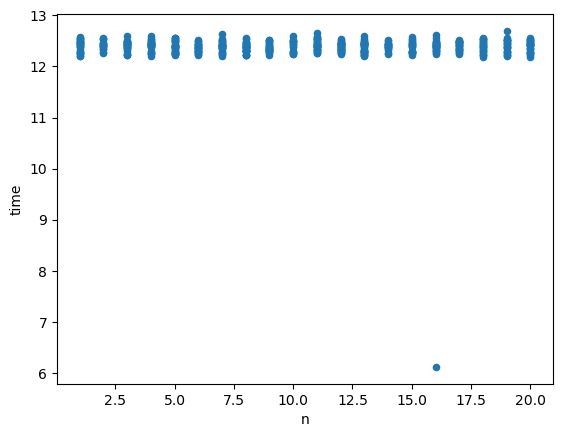

In [6]:
df.plot(kind='scatter', x='n', y='time')

In [7]:
from sklearn.linear_model import LinearRegression

X = df[['n']]
y = df['time']

m = LinearRegression()
m.fit(X, y)

m.intercept_, m.coef_

(12.405405583687552, array([-0.00227181]))